In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
from ipywidgets import IntProgress
from IPython.display import display

In [3]:
from dependencies_calculator import DependenciesCalculator
from cost_calculator_factory import CostCalculatorFactory
from multibinary_converter import MultiBinaryConverter
from multidiscrete_converter import MultiDiscreteConverter
from fitness_calculator import FitnessCalculator

In [4]:
from genetic_multibinary_space_config import GeneticMultiBinarySpaceConfig
from genetic_multidiscrete_space_config import GeneticMultiDiscreteSpaceConfig
from genetic_config import GeneticConfig
from genetic_solver import GeneticSolver

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
M = 10 ** 6

In [7]:
read_matrix = lambda path: pd.read_csv(path, index_col=0, encoding='utf-8').to_numpy()

In [8]:
C = read_matrix('../publication_4/script/out/C.csv')

In [9]:
D = read_matrix('../publication_4/script/out/D.csv')

In [10]:
Q = read_matrix('../publication_4/script/out/Q.csv')

In [11]:
R = read_matrix('../publication_4/script/out/R.csv')

In [12]:
constants_file = open('../publication_4/script/out/constants.json', 'r', encoding='utf-8')
constants_data = constants_file.read()
constants_file.close()
constants = json.loads(constants_data)

In [13]:
n = constants['n']
m = constants['m']
l = constants['l']

In [14]:
# solver_name = 'cbc'

In [15]:
calculate_deps_progress = IntProgress(min=0, max=m, value=0, description='deps', bar_style='success')
display(calculate_deps_progress)
deps_calculator = DependenciesCalculator(D, m, calculate_deps_progress)
sum_D = deps_calculator.calculate()

IntProgress(value=0, bar_style='success', description='deps', max=124)

In [16]:
def calculate(k):
    config = GeneticConfig()
    multidiscrete_converter = MultiDiscreteConverter(m, k)
    cost_calculator_factory = CostCalculatorFactory(Q, sum_D, C, R)
    multidiscrete_fitness_calculator = FitnessCalculator(M, cost_calculator_factory, multidiscrete_converter)
    multidiscrete_space_config = GeneticMultiDiscreteSpaceConfig(m, k)
    multidiscrete_config = GeneticConfig()
    multibinary_progress = IntProgress(min=0, max=config.num_generations, value=0, description=str(k), bar_style='success')
    multidiscrete_genetic_solver = GeneticSolver(config, multidiscrete_space_config, multidiscrete_fitness_calculator, multibinary_progress)
    # display(multibinary_progress)
    best_solution, best_fitness, best_idx, duration = multidiscrete_genetic_solver.solve()
    A = multidiscrete_converter.convert(best_solution)
    cost_calculator = cost_calculator_factory.get_cost_calculator(A)
    cost = cost_calculator.calculate()
    return cost

In [17]:
k_to_cost = {}

In [18]:
count = 50
progress = IntProgress(min=0, max=count, value=0, description='progress', bar_style='success')
display(progress)
for k in range(1, count + 1):
    cost = calculate(k)
    k_to_cost[k] = cost
    progress.value += 1

IntProgress(value=0, bar_style='success', description='progress', max=50)

In [19]:
x = []
y = []

In [20]:
for key in k_to_cost.keys():
    x.append(key)
    y.append(k_to_cost[key])

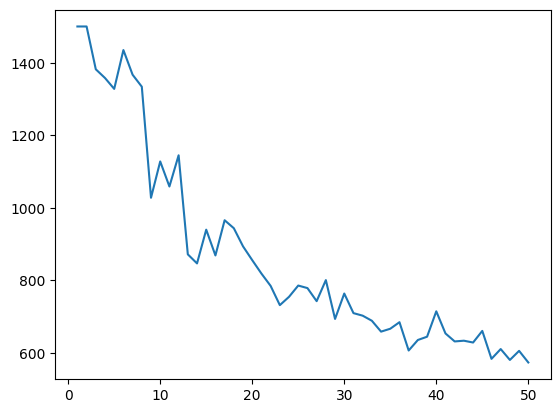

In [21]:
plt.plot(x, y)